In [ ]:
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

#phase2 libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import seaborn as sns
from sklearn.metrics import roc_curve, auc
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import History
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [ ]:
df=pd.read_csv('/content/Iphone_purchase.csv')

In [ ]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


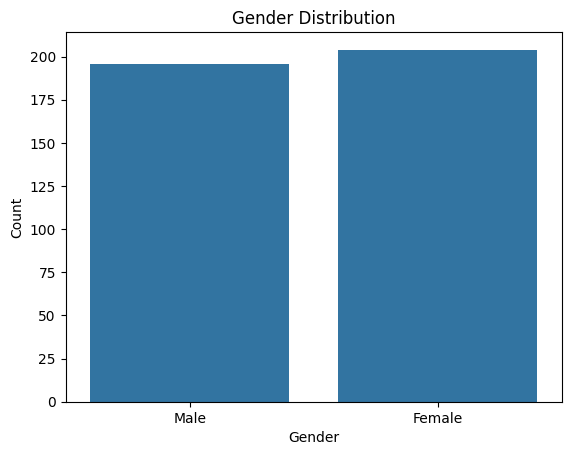

In [ ]:


sns.countplot(x='Gender', data=df)

# Set the title and labels
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Display the plot
plt.show()


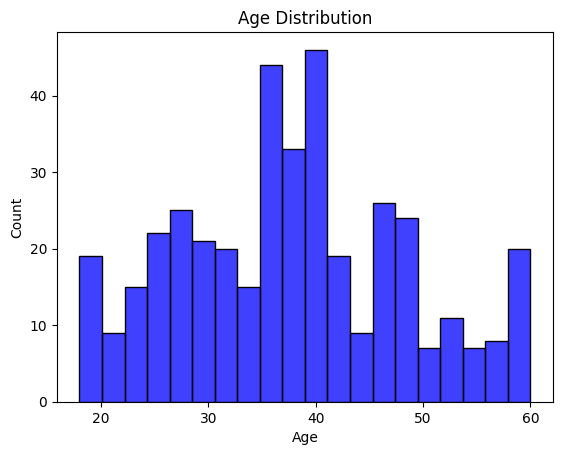

In [ ]:

sns.histplot(df['Age'], bins=20, color='blue')

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()


Text(0, 0.5, 'Density')

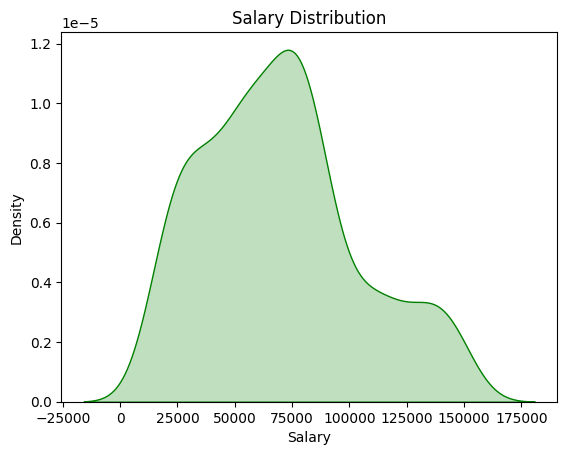

In [ ]:
sns.kdeplot(df['EstimatedSalary'], color='green', fill=True)

plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Density')



In [ ]:
df = df.drop('User ID', axis=1)

In [ ]:
df.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [ ]:
df.dtypes

Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [ ]:
df.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
df['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

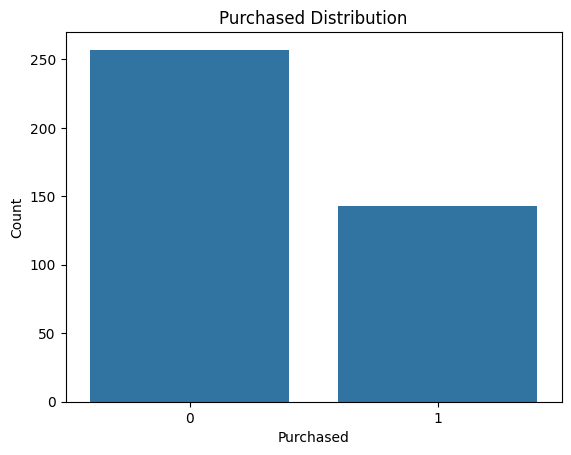

In [ ]:


sns.countplot(x='Purchased', data=df)

plt.title('Purchased Distribution')
plt.xlabel('Purchased')
plt.ylabel('Count')

plt.show()


In [ ]:
df['Age-Salary Ratio'] = df['Age'] / df['EstimatedSalary']

In [ ]:

le = LabelEncoder()

df['Gender'] = le.fit_transform(df['Gender'])
df.head()

,Gender,Age,EstimatedSalary,Purchased,Age-Salary Ratio
0,1,19,19000,0,0.001000
1,1,35,20000,0,0.001750
2,0,26,43000,0,0.000605
3,0,27,57000,0,0.000474
4,1,19,76000,0,0.000250


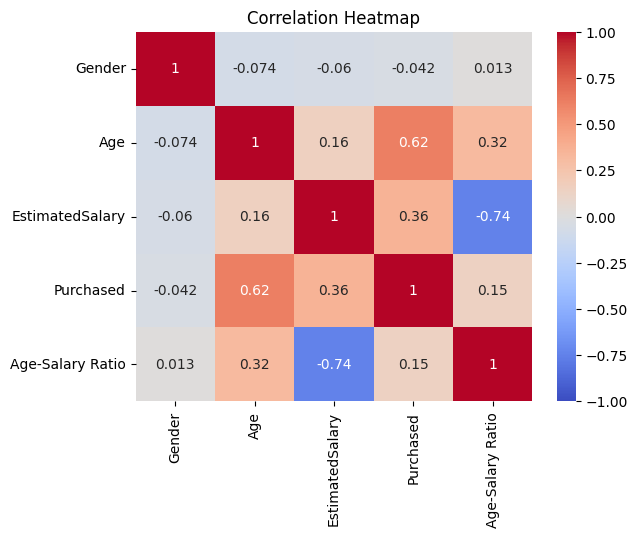

In [ ]:


corr = df.corr()
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


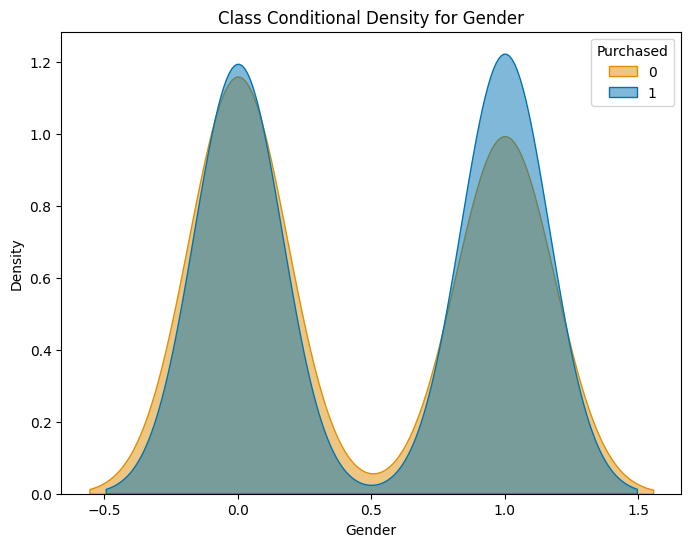

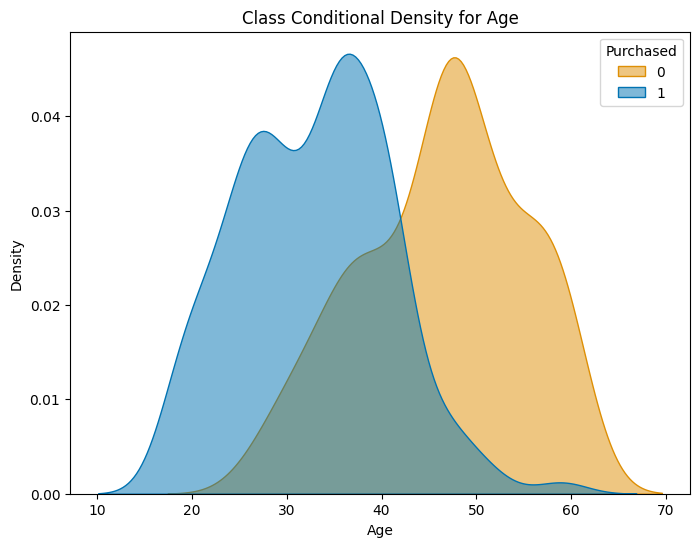

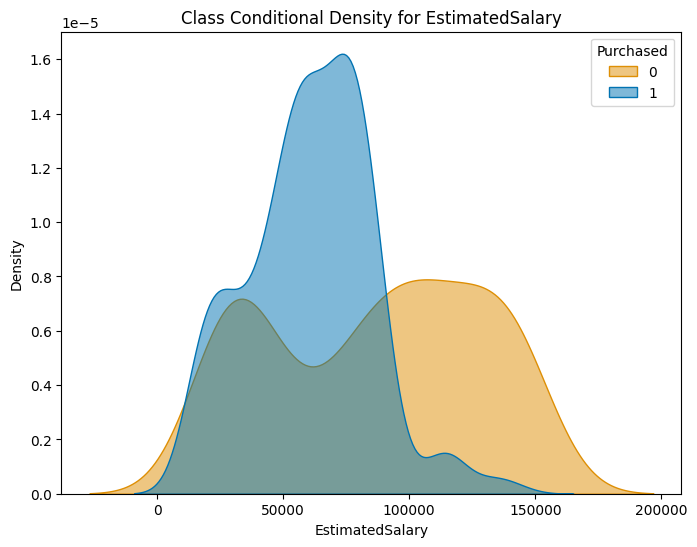

<ipython-input-16-25e65629d004>:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=feature, hue='Purchased', fill=True, common_norm=False, alpha=0.5, palette='colorblind',


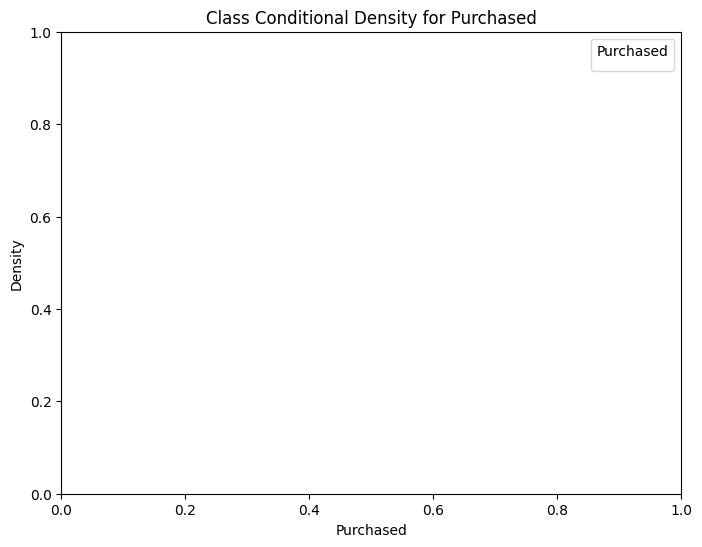

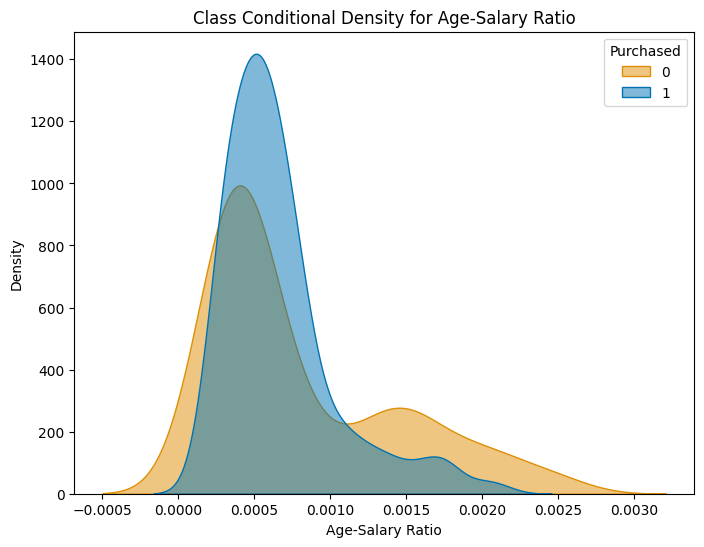

In [ ]:
feature_names = df.columns.tolist()

for feature in feature_names:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(data=df, x=feature, hue='Purchased', fill=True, common_norm=False, alpha=0.5, palette='colorblind',
            hue_order=[0, 1])
    plt.legend(title='Purchased', labels=[0, 1])
    plt.title(f'Class Conditional Density for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    # plt.legend(title='Class', loc='upper right')
    plt.show()

In [ ]:


scaler = MinMaxScaler()

df[['Age', 'EstimatedSalary', 'Age-Salary Ratio']] = scaler.fit_transform(df[['Age', 'EstimatedSalary', 'Age-Salary Ratio']])

df

,Gender,Age,EstimatedSalary,Purchased,Age-Salary Ratio
0,1,0.023810,0.029630,0,0.345712
1,1,0.404762,0.037037,0,0.668182
2,0,0.190476,0.207407,0,0.175727
3,0,0.214286,0.311111,0,0.119417
4,1,0.023810,0.451852,0,0.023241
...,...,...,...,...,...
395,0,0.666667,0.192593,1,0.398146
396,1,0.785714,0.059259,1,0.869142
397,0,0.761905,0.037037,1,0.990653
398,1,0.428571,0.133333,0,0.384799


# Models

In [ ]:


X = df.drop('Purchased', axis=1)
y = df['Purchased']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)


KNeighborsClassifier()

In [ ]:
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

SVC()

In [ ]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:

naive_bayes_pred = naive_bayes_classifier.predict(X_test)
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_pred)
print("Naïve Bayes Classifier Accuracy:", naive_bayes_accuracy)




Naïve Bayes Classifier Accuracy: 0.95


In [ ]:

knn_pred = knn_classifier.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print("KNN Classifier Accuracy:", knn_accuracy)

KNN Classifier Accuracy: 0.925


In [ ]:

svm_accuracy = accuracy_score(y_test, svm_classifier.predict(X_test))
print("SVM Classifier Accuracy:", svm_accuracy)


SVM Classifier Accuracy: 0.925


In [ ]:

dt_accuracy = accuracy_score(y_test, dt_classifier.predict(X_test))
print("Decision Tree Classifier Accuracy:", dt_accuracy)


Decision Tree Classifier Accuracy: 0.8375


# Tuning Hyperparameters

**Grid Search for Naïve Bayes Classifier**

In [ ]:


naive_bayes_param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5],
    'priors': [None, [0.5, 0.5], [0.3, 0.7], [0.7, 0.3]]
}

naive_bayes_classifier = GaussianNB()

naive_bayes_grid_search = GridSearchCV(estimator=naive_bayes_classifier, param_grid=naive_bayes_param_grid, cv=5)
naive_bayes_grid_search.fit(X_train, y_train)

best_naive_bayes_classifier = naive_bayes_grid_search.best_estimator_

naive_bayes_pred = best_naive_bayes_classifier.predict(X_test)
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_pred)
print("Best Naïve Bayes Classifier Accuracy:", naive_bayes_accuracy)


Best Naïve Bayes Classifier Accuracy: 0.95


In [ ]:
best_naive_bayes_classifier.get_params()

{'priors': None, 'var_smoothing': 1e-09}

**Naive Bayes Accuracy with Changing priors**

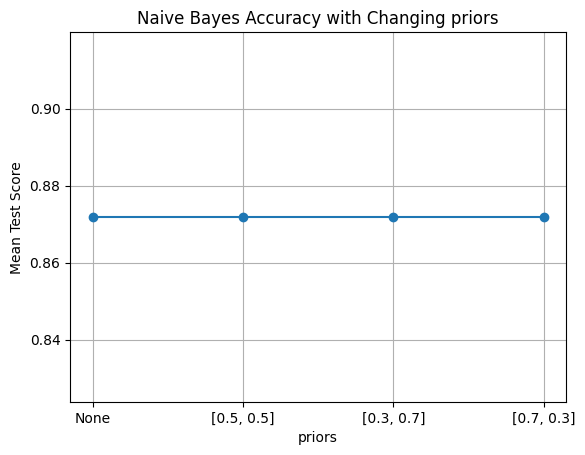

In [ ]:
results = naive_bayes_grid_search.cv_results_
priors_values = [str(prior) for prior in naive_bayes_param_grid['priors']]
mean_test_scores = results['mean_test_score'][:len(priors_values)]
plt.figure()
plt.plot(priors_values, mean_test_scores, marker='o')
plt.xlabel('priors')
plt.ylabel('Mean Test Score')
plt.title('Naive Bayes Accuracy with Changing priors')
plt.grid(True)
plt.show()


**Naiive Bayes Accuracy with Changing var_smoothing**

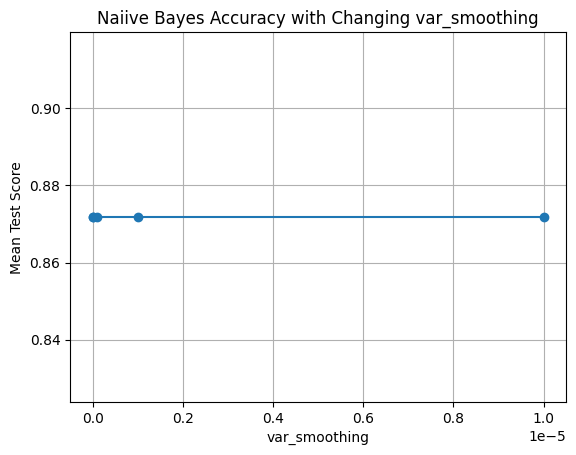

In [ ]:

results = naive_bayes_grid_search.cv_results_
n_neighbors_values = [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
mean_test_scores = results['mean_test_score']
plt.figure()
plt.plot(n_neighbors_values, mean_test_scores[:len(n_neighbors_values)], marker='o')
plt.xlabel('var_smoothing')
plt.ylabel('Mean Test Score')
plt.title('Naiive Bayes Accuracy with Changing var_smoothing')
plt.grid(True)
plt.show()


**Grid Search for KNN Classifier**

In [ ]:
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

knn_classifier = KNeighborsClassifier()

knn_grid_search = GridSearchCV(estimator=knn_classifier, param_grid=knn_param_grid, cv=5)
knn_grid_search.fit(X_train, y_train)

best_knn_classifier = knn_grid_search.best_estimator_

knn_pred = best_knn_classifier.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print("Best KNN Classifier Accuracy:", knn_accuracy)



Best KNN Classifier Accuracy: 0.925


In [ ]:
best_knn_classifier.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 7,
 'p': 2,
 'weights': 'uniform'}

**KNN Accuracy with Changing weights**

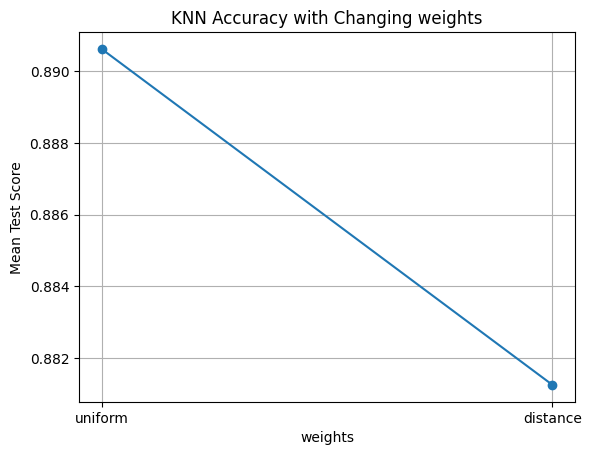

In [ ]:

results = knn_grid_search.cv_results_
n_neighbors_values =['uniform', 'distance']
mean_test_scores = results['mean_test_score']
plt.figure()
plt.plot(n_neighbors_values, mean_test_scores[:len(n_neighbors_values)], marker='o')
plt.xlabel('weights')
plt.ylabel('Mean Test Score')
plt.title('KNN Accuracy with Changing weights')
plt.grid(True)
plt.show()

**KNN Accuracy with Changing Algorithm**

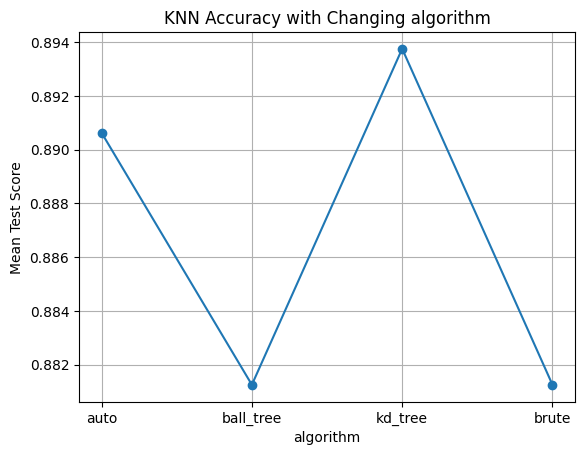

In [ ]:

results = knn_grid_search.cv_results_
n_neighbors_values = ['auto', 'ball_tree', 'kd_tree', 'brute']
mean_test_scores = results['mean_test_score']
plt.figure()
plt.plot(n_neighbors_values, mean_test_scores[:len(n_neighbors_values)], marker='o')
plt.xlabel('algorithm')
plt.ylabel('Mean Test Score')
plt.title('KNN Accuracy with Changing algorithm')
plt.grid(True)
plt.show()

**KNN Accuracy with Changing n_neighbors**

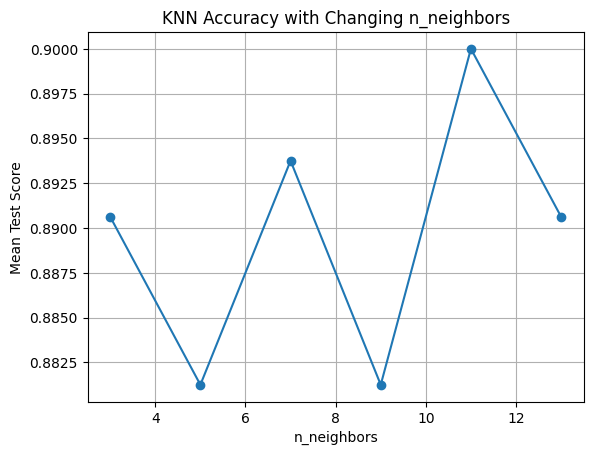

In [ ]:

results = knn_grid_search.cv_results_
n_neighbors_values = [3, 5, 7, 9, 11, 13]
mean_test_scores = results['mean_test_score']
plt.figure()
plt.plot(n_neighbors_values, mean_test_scores[:len(n_neighbors_values)], marker='o')
plt.xlabel('n_neighbors')
plt.ylabel('Mean Test Score')
plt.title('KNN Accuracy with Changing n_neighbors')
plt.grid(True)
plt.show()

**Grid search for svm**

In [ ]:

svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
}


svm_grid_search = GridSearchCV(estimator=SVC(), param_grid=svm_param_grid, cv=5)
svm_grid_search.fit(X_train, y_train)

best_svm_model = svm_grid_search.best_estimator_


svm_accuracy = accuracy_score(y_test, best_svm_model.predict(X_test))
print("Best SVM Classifier Accuracy:", svm_accuracy)


Best SVM Classifier Accuracy: 0.9125


In [ ]:
best_svm_model.get_params()


{'C': 10,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

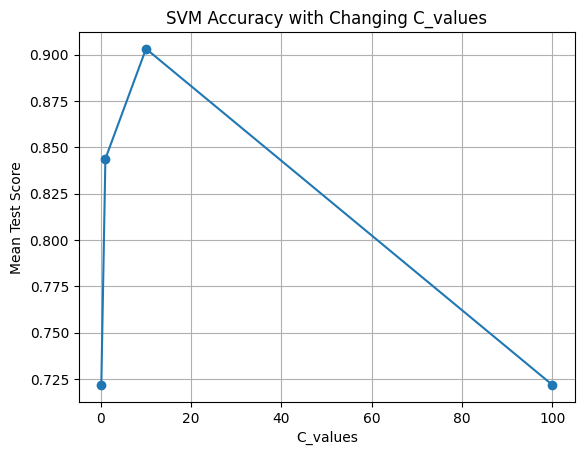

In [ ]:
results = svm_grid_search.cv_results_
C_values = [0.1, 1, 10, 100]
mean_test_scores = results['mean_test_score']
plt.figure()
plt.plot(C_values, mean_test_scores[:len(C_values)], marker='o')
plt.xlabel('C_values')
plt.ylabel('Mean Test Score')
plt.title('SVM Accuracy with Changing C_values')
plt.grid(True)
plt.show()

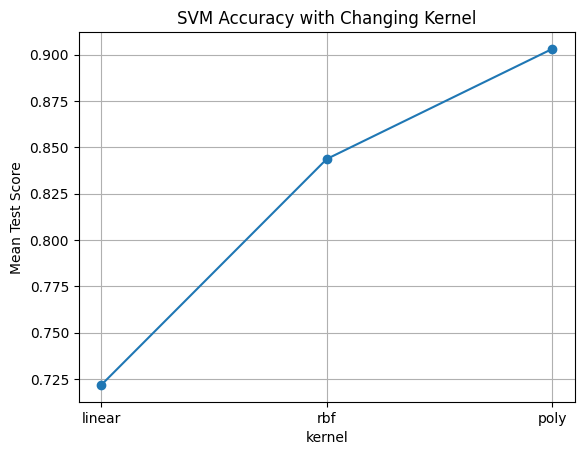

In [ ]:
results = svm_grid_search.cv_results_
kernel = ['linear', 'rbf', 'poly']
mean_test_scores = results['mean_test_score']
plt.figure()
plt.plot(kernel, mean_test_scores[:len(kernel)], marker='o')
plt.xlabel('kernel')
plt.ylabel('Mean Test Score')
plt.title('SVM Accuracy with Changing Kernel')
plt.grid(True)
plt.show()




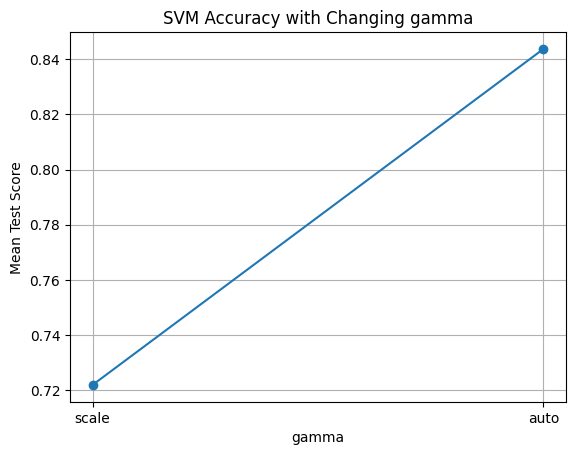

In [ ]:
results = svm_grid_search.cv_results_
gamma = ['scale', 'auto']
mean_test_scores = results['mean_test_score']
plt.figure()
plt.plot(gamma, mean_test_scores[:len(gamma)], marker='o')
plt.xlabel('gamma')
plt.ylabel('Mean Test Score')
plt.title('SVM Accuracy with Changing gamma')
plt.grid(True)
plt.show()


**Grid search for decision tree**

In [ ]:

decision_tree_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

decision_tree_grid_search = GridSearchCV(DecisionTreeClassifier(), decision_tree_param_grid, cv=5, scoring='accuracy')
decision_tree_grid_search.fit(X_train, y_train)


best_decision_tree_model = decision_tree_grid_search.best_estimator_

decision_tree_accuracy = accuracy_score(y_test, best_decision_tree_model.predict(X_test))
print("Best Decision Tree Classifier Accuracy:", decision_tree_accuracy)





Best Decision Tree Classifier Accuracy: 0.875


In [ ]:

 best_decision_tree_model.get_params()


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

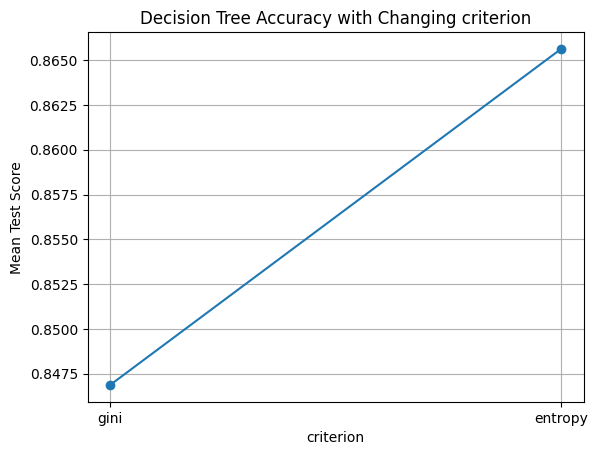

In [ ]:

results = decision_tree_grid_search.cv_results_
criterion = ['gini', 'entropy']
mean_test_scores = results['mean_test_score']
plt.figure()
plt.plot(criterion, mean_test_scores[:len(criterion)], marker='o')
plt.xlabel('criterion')
plt.ylabel('Mean Test Score')
plt.title('Decision Tree Accuracy with Changing criterion')
plt.grid(True)
plt.show()

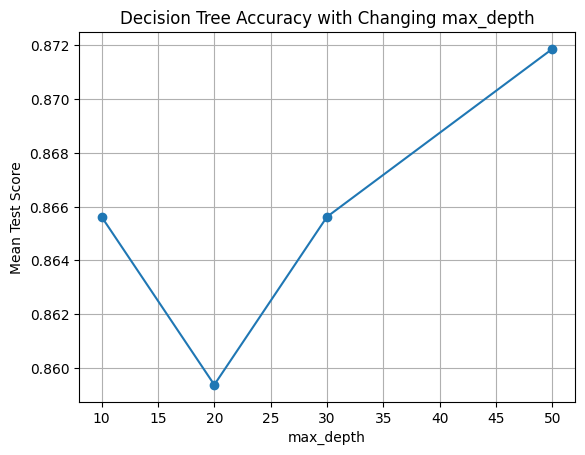

In [ ]:
results = decision_tree_grid_search.cv_results_
max_depth = [None, 10, 20, 30, 50]
mean_test_scores = results['mean_test_score']
plt.figure()
plt.plot(max_depth, mean_test_scores[:len(max_depth)], marker='o')
plt.xlabel('max_depth')
plt.ylabel('Mean Test Score')
plt.title('Decision Tree Accuracy with Changing max_depth')
plt.grid(True)
plt.show()


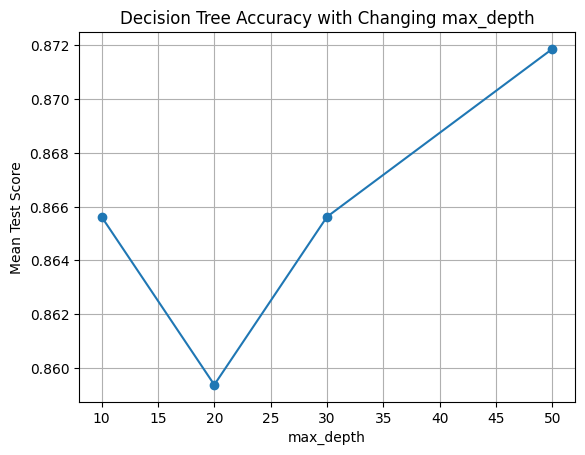

In [ ]:
results = decision_tree_grid_search.cv_results_
max_depth = [None, 10, 20, 30, 50]
mean_test_scores = results['mean_test_score']
plt.figure()
plt.plot(max_depth, mean_test_scores[:len(max_depth)], marker='o')
plt.xlabel('max_depth')
plt.ylabel('Mean Test Score')
plt.title('Decision Tree Accuracy with Changing max_depth')
plt.grid(True)
plt.show()


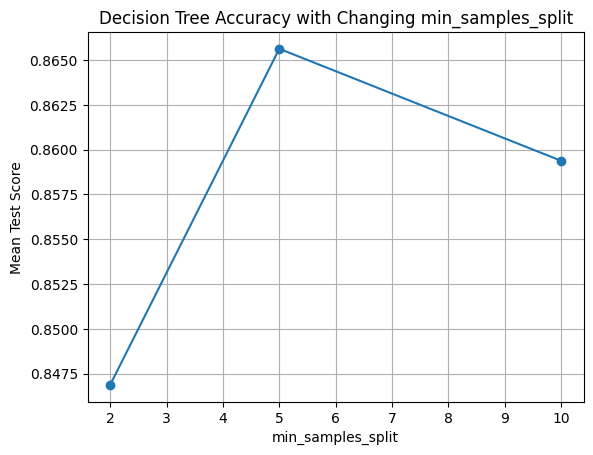

In [ ]:
results = decision_tree_grid_search.cv_results_
min_samples_split = [2, 5, 10]
mean_test_scores = results['mean_test_score']
plt.figure()
plt.plot(min_samples_split, mean_test_scores[:len(min_samples_split)], marker='o')
plt.xlabel('min_samples_split')
plt.ylabel('Mean Test Score')
plt.title('Decision Tree Accuracy with Changing min_samples_split')
plt.grid(True)
plt.show()

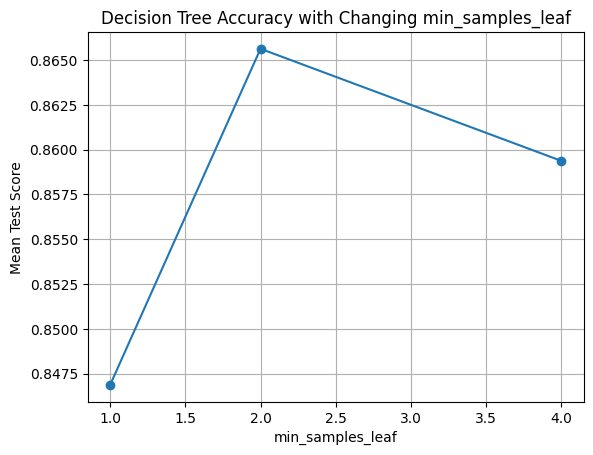

In [ ]:
results = decision_tree_grid_search.cv_results_
min_samples_leaf = [1, 2, 4]
mean_test_scores = results['mean_test_score']
plt.figure()
plt.plot(min_samples_leaf, mean_test_scores[:len(min_samples_leaf)], marker='o')
plt.xlabel('min_samples_leaf')
plt.ylabel('Mean Test Score')
plt.title('Decision Tree Accuracy with Changing min_samples_leaf')
plt.grid(True)
plt.show()

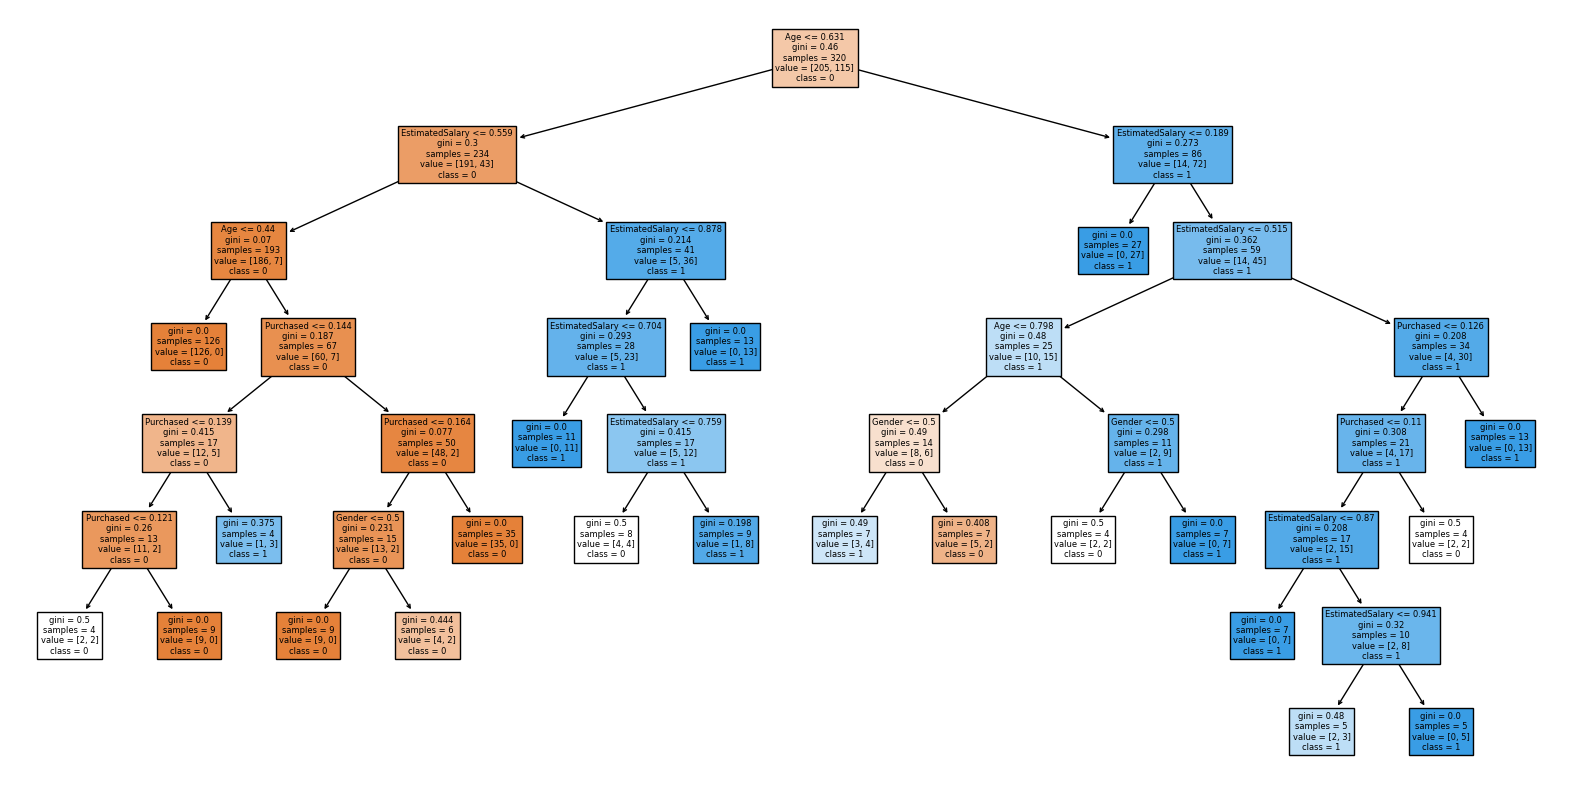

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

clf = best_decision_tree_model

feature_names = df.columns[:-1]
class_names = df['Purchased'].astype(str).unique()

plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=feature_names, class_names=class_names)
plt.show()

**Visualization of Confusion Matrices**

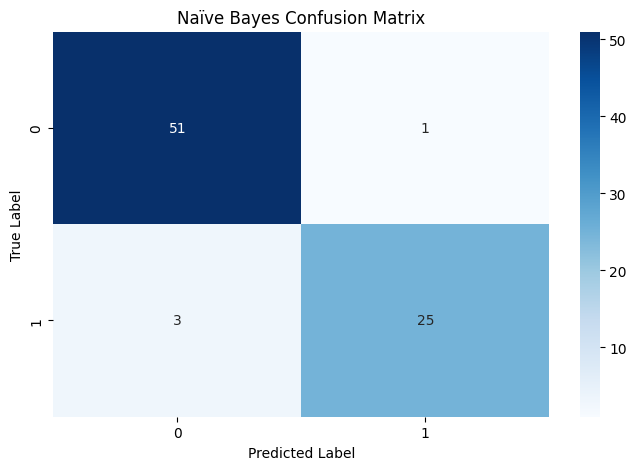

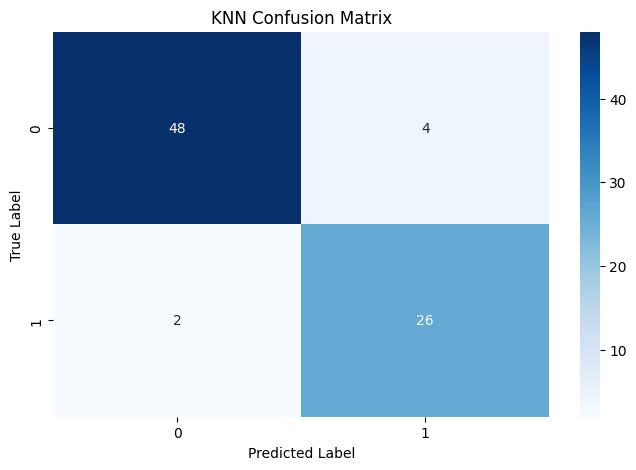

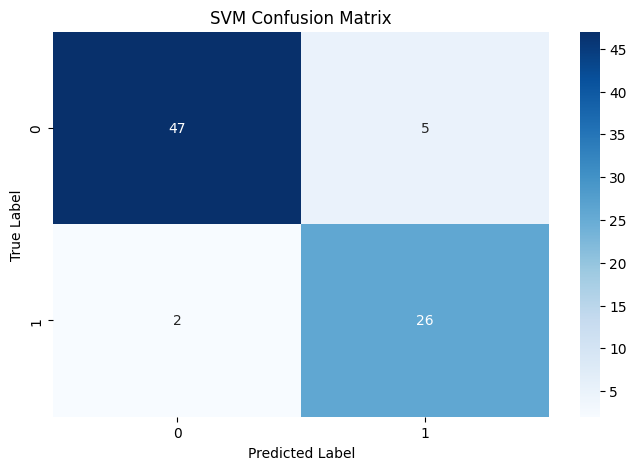

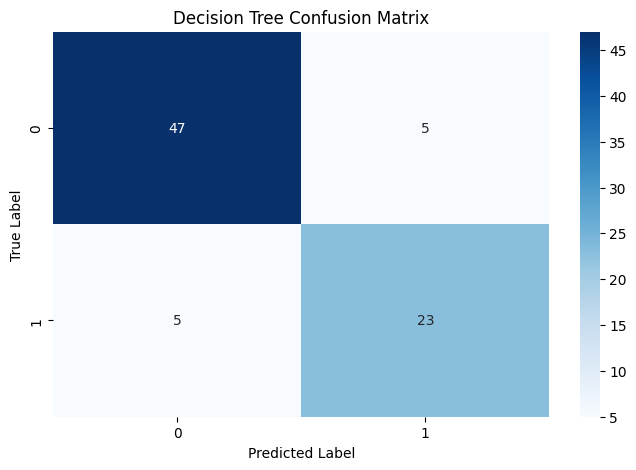

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



naive_bayes_pred = naive_bayes_classifier.predict(X_test)
knn_pred = knn_grid_search.best_estimator_.predict(X_test)
svm_pred = best_svm_model.predict(X_test)
decision_tree_pred = best_decision_tree_model.predict(X_test)

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

plot_confusion_matrix(y_test, naive_bayes_pred, "Naïve Bayes Confusion Matrix")
plot_confusion_matrix(y_test, knn_pred, "KNN Confusion Matrix")
plot_confusion_matrix(y_test, svm_pred, "SVM Confusion Matrix")
plot_confusion_matrix(y_test, decision_tree_pred, "Decision Tree Confusion Matrix")


**ROC curve**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


nb_probs = best_naive_bayes_classifier.predict_proba(X_test)[:, 1]
knn_probs = knn_grid_search.best_estimator_.predict_proba(X_test)[:, 1]
svm_scores = best_svm_model.decision_function(X_test)
svm_probs = 1 / (1 + np.exp(-svm_scores))
dt_probs = best_decision_tree_model.predict_proba(X_test)[:, 1]


nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
nb_roc_auc = auc(nb_fpr, nb_tpr)

knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
knn_roc_auc = auc(knn_fpr, knn_tpr)

svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
svm_roc_auc = auc(svm_fpr, svm_tpr)

dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
dt_roc_auc = auc(dt_fpr, dt_tpr)




**ROC curve for Naive Bayes model**

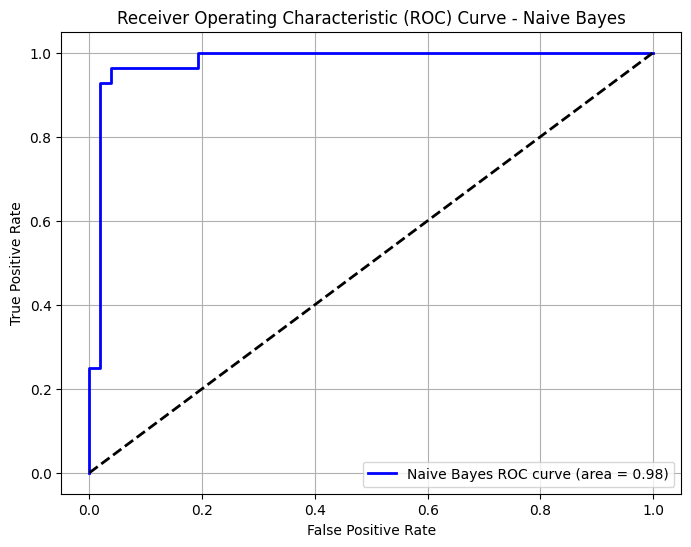

In [ ]:

# Plot ROC curve for Naive Bayes model
plt.figure(figsize=(8, 6))
plt.plot(nb_fpr, nb_tpr, color='blue', lw=2, label='Naive Bayes ROC curve (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Naive Bayes')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

 **ROC curve for KNN model**

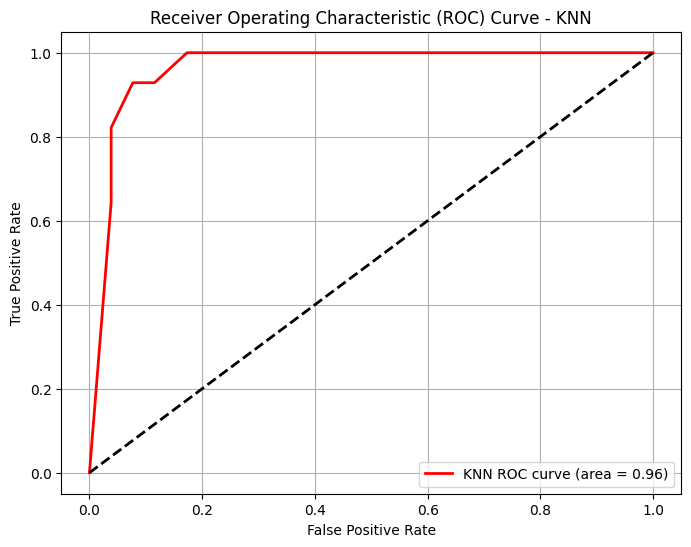

In [ ]:

# Plot ROC curve for KNN model
plt.figure(figsize=(8, 6))
plt.plot(knn_fpr, knn_tpr, color='red', lw=2, label='KNN ROC curve (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - KNN')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


**ROC curve for SVM model**

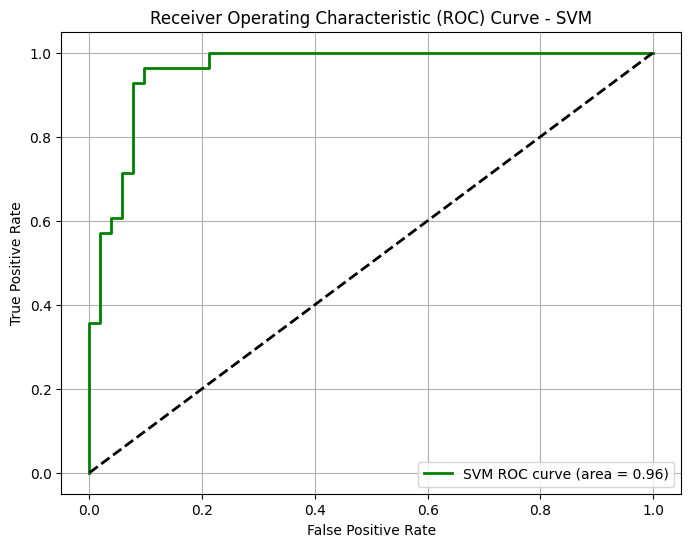

In [ ]:
# Plot ROC curve for SVM model
plt.figure(figsize=(8, 6))
plt.plot(svm_fpr, svm_tpr, color='green', lw=2, label='SVM ROC curve (area = %0.2f)' % svm_roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - SVM')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


**ROC curve for Decision Tree model**

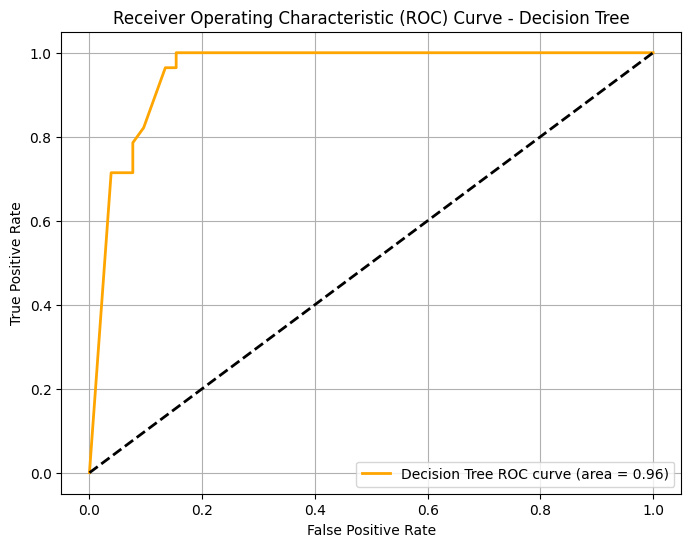

In [ ]:
# Plot ROC curve for Decision Tree model
plt.figure(figsize=(8, 6))
plt.plot(dt_fpr, dt_tpr, color='orange', lw=2, label='Decision Tree ROC curve (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

**Classification Report for Naïve Bayes Classifier**


In [ ]:

print(classification_report(y_test, naive_bayes_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        52
           1       0.96      0.89      0.93        28

    accuracy                           0.95        80
   macro avg       0.95      0.94      0.94        80
weighted avg       0.95      0.95      0.95        80



**Classification Report for KNN Classifier**


In [ ]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        52
           1       0.87      0.93      0.90        28

    accuracy                           0.93        80
   macro avg       0.91      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80



**Classification Report for SVM**


In [ ]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93        52
           1       0.84      0.93      0.88        28

    accuracy                           0.91        80
   macro avg       0.90      0.92      0.91        80
weighted avg       0.92      0.91      0.91        80



**Classification Report for Decision Tree Classifier**

In [ ]:


decision_tree_classification_report = classification_report(y_test, decision_tree_pred)
print("\nClassification Report for Decision Tree Classifier:")
print(decision_tree_classification_report)



Classification Report for Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        52
           1       0.82      0.82      0.82        28

    accuracy                           0.88        80
   macro avg       0.86      0.86      0.86        80
weighted avg       0.88      0.88      0.88        80



# MLP

In [ ]:


X = df.drop('Purchased', axis=1)
y = df['Purchased']

# Assuming you have already preprocessed the data and obtained X and y
# Splitting the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=0)

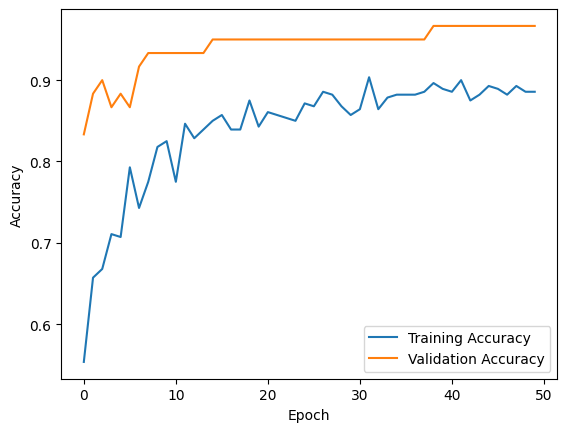

In [ ]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9333333373069763


# Hyperparameter Tuning

In [ ]:
# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(64,), (64, 32), (128,), (128, 64)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(MLPClassifier(random_state=42), param_grid, cv=3, verbose=2, n_jobs=-1)

# Fit the data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

Fitting 3 folds for each of 24 candidates, totalling 72 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (64, 32)}
Best Score: 0.8927018988789751


**Accuracy of Best Hyper parameters**

In [ ]:

best_model = MLPClassifier(random_state=42, **best_params)


best_model.fit(X_train, y_train)


test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy with Best Parameters:", test_accuracy)


Test Accuracy with Best Parameters: 0.9333333333333333


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


**Confusion Matrix**

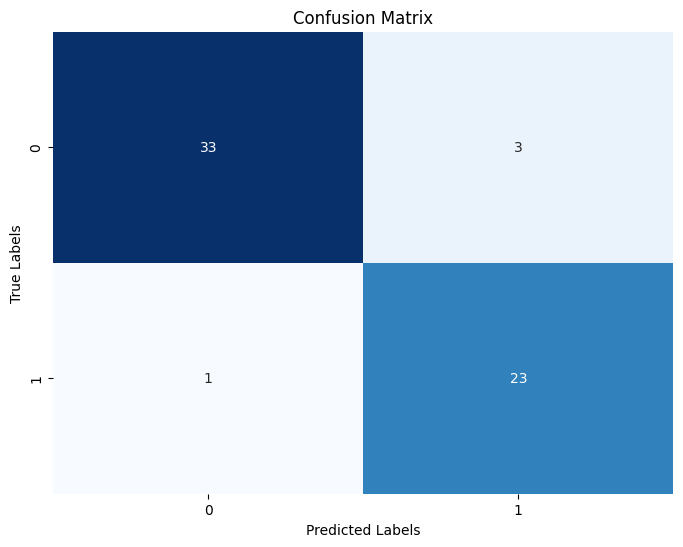

In [ ]:


y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


**ROC Curve**

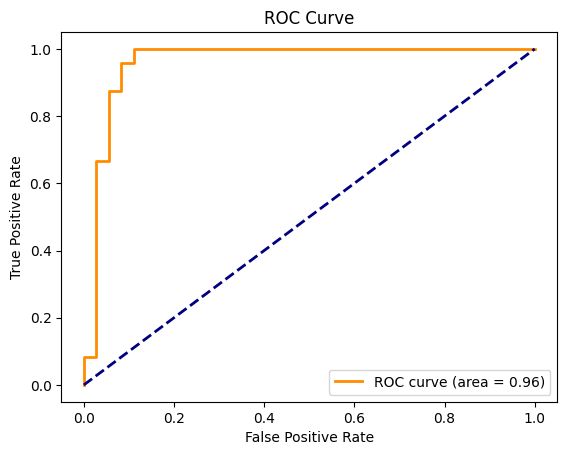

In [ ]:

# ROC Curve
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

**Classification Report for MLP**

In [ ]:
from sklearn.metrics import classification_report


print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))

Classification Report:
              precision    recall  f1-score   support

      Benign       0.97      0.92      0.94        36
   Malignant       0.88      0.96      0.92        24

    accuracy                           0.93        60
   macro avg       0.93      0.94      0.93        60
weighted avg       0.94      0.93      0.93        60

